# **SHE BUMA REPORT** 

**Author : Sherly Ekaputri Arnas**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install july

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

# Dataset Information
Dataset berisikan temuan-temuan positif dan negatif di PT BUMA tahun 2019-2020

# DATA KNOWLEDGE

In [ ]:
 df = pd.read_csv('/content/drive/MyDrive/2023/SHE/buma_2019_2020.csv')
 df.head(100)


,#Task,Tanggal Pembuatan,Hari,Tanggal,Bulan,Tahun,Jam,Menit,Minggu,Hari Dalam Minggu,...,Departemen Safety Evaluator,Catatan Verifikasi,Kekerapan,Konsekuensi,Nilai Resiko,Status,Catatan Pelapor,Catatan PIC,Catatan Safety,Foto Laporan
0,2106,14-02-19 11:41,Kamis,14,2,2019,11,41,7,4,...,"Safety, Health, & Environment",NaN,Langka,Lainnya,NaN,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2106
1,2416,18-02-19 10:00,Senin,18,2,2019,10,0,8,1,...,NaN,NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2416
2,2457,18-02-19 12:59,Senin,18,2,2019,12,59,8,1,...,Safety Health and Environmental,NaN,Langka,Lainnya,NaN,BUKAN TEMUAN,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2457
3,2461,18-02-19 13:52,Senin,18,2,2019,13,52,8,1,...,"Safety, Health, & Environment",NaN,Langka,Sedang,Medium,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2461
4,2478,18-02-19 17:25,Senin,18,2,2019,17,25,8,1,...,"Safety, Health, & Environment",NaN,Langka,Sedang,Medium,BUKAN TEMUAN,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12609,27-03-19 08:14,Rabu,27,3,2019,8,14,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12609
96,12741,27-03-19 14:26,Rabu,27,3,2019,14,26,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12741
97,12742,27-03-19 14:33,Rabu,27,3,2019,14,33,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12742
98,12817,27-03-19 19:37,Rabu,27,3,2019,19,37,13,3,...,HSE & Compliance,NaN,Langka,Sedang,Medium,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12817


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #Task                        5335 non-null   int64  
 1   Tanggal Pembuatan            5335 non-null   object 
 2   Hari                         5335 non-null   object 
 3   Tanggal                      5335 non-null   int64  
 4   Bulan                        5335 non-null   int64  
 5   Tahun                        5335 non-null   int64  
 6   Jam                          5335 non-null   int64  
 7   Menit                        5335 non-null   int64  
 8   Minggu                       5335 non-null   int64  
 9   Hari Dalam Minggu            5335 non-null   int64  
 10  Sumber Data                  5335 non-null   object 
 11  NPK Pelapor                  5335 non-null   int64  
 12  Pelapor                      5335 non-null   object 
 13  Jabatan Fungsional

berdasarkan data info di atas dapat disimpulkan bahwa :
1. banyak features yang null yaitu feature `Catatan Verifikasi`,`Catatan Pelapor`, 
 `Catatan PIC`, `Catatan Safety`
2. feature `#Task`,`Hari`, `Tanggal`, `Bulan`,`Jam`, `Menit`, `Minggu`, `Hari Dalam Minggu`, `NPK Pelapor`,`NPK PIC`, `NPK Safety Evaluator`,`Foto Laporan` tidak diperlukan. 
3. Format datetime pada `Tanggal Pembuatan` perlu diganti menjadi tipe data date sehingga lebih mudah untuk diolah



# Exploratory Data Analysis

1. Data Cleaning 
2. Handling Missing Value

In [ ]:
#drop unnecessary features
df.drop(['#Task', 'Jam', 'Menit', 'Minggu',
              'Hari Dalam Minggu' ,'NPK Pelapor','NPK PIC', 'Golden Rule',
              'NPK Safety Evaluator','Catatan Verifikasi','Catatan Pelapor', 
              'Catatan PIC', 'Catatan Safety', 'Foto Laporan'], inplace = True , axis = 1)

In [ ]:
#handling missing value
df['Departemen Pelapor'] = df['Departemen Pelapor'].fillna('')
df['Ketidaksesuaian'] = df['Ketidaksesuaian'].fillna('')

In [ ]:
import datetime
df['Tanggal Pembuatan']= df['Tahun'].map(str) + df['Bulan'].map(str) + df['Tanggal'].map(str)
df['Tanggal Pembuatan'] = pd.to_datetime(df['Tanggal Pembuatan'], format='%Y%m%d')
df['Due Date Penyelesaian'] = pd.to_datetime(df['Due Date Penyelesaian'], format='%d-%b-%y')
df['Tanggal Aktual Penyelesaian'] = pd.to_datetime(df['Tanggal Aktual Penyelesaian'], format='%d-%b-%y')

# Data Visualisasi

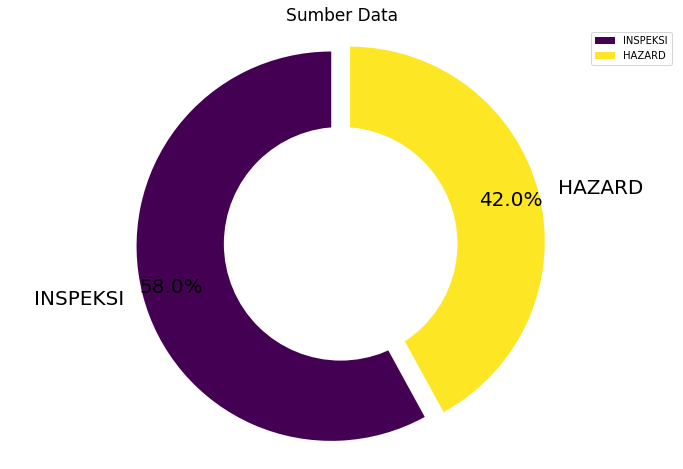

<Figure size 432x288 with 0 Axes>

In [ ]:
# Get value counts for 'Sumber Data'
value_counts = df['Sumber Data'].value_counts()

# Define labels and sizes for the pie chart
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()

# Define colors using a viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(my_labels)))

# Define explode parameter for the pie chart
my_explode = [0.05, 0.05]

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=my_labels, autopct='%1.1f%%',pctdistance=0.85, startangle=90, colors=colors, 
        explode=my_explode, textprops={'fontsize': 20, 'color': 'black'})
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Sumber Data', fontsize=17)
plt.axis('equal')
plt.legend()
plt.show()
plt.savefig('sumber_data.png')

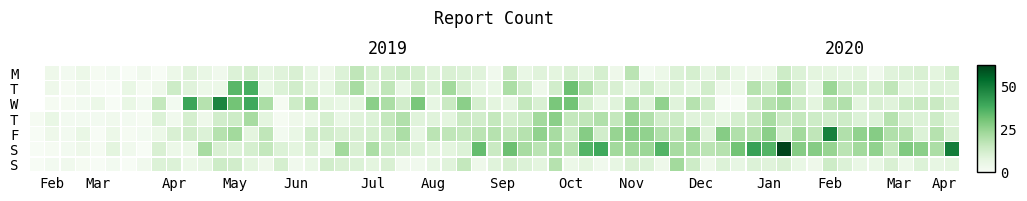

In [ ]:
# berapa jumlah laporan per hari 

import july

grp = df.groupby(['Tahun', 'Bulan', 'Tanggal'])["Tanggal Pembuatan"].count().reset_index(name="count")
grp['Tanggal Pembuatan']= grp['Tahun'].map(str) +'/'+ grp['Tanggal'].map(str)  +'/'+ grp['Bulan'].map(str)
grp['Tanggal Pembuatan'] = pd.to_datetime(grp['Tanggal Pembuatan'], format='%Y/%d/%m')
july.heatmap(
    grp['Tanggal Pembuatan'],
    grp['count'], 
    cmap="Greens", 
    colorbar=True,
    fontsize=10,
    title="Report Count"
)


In [ ]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

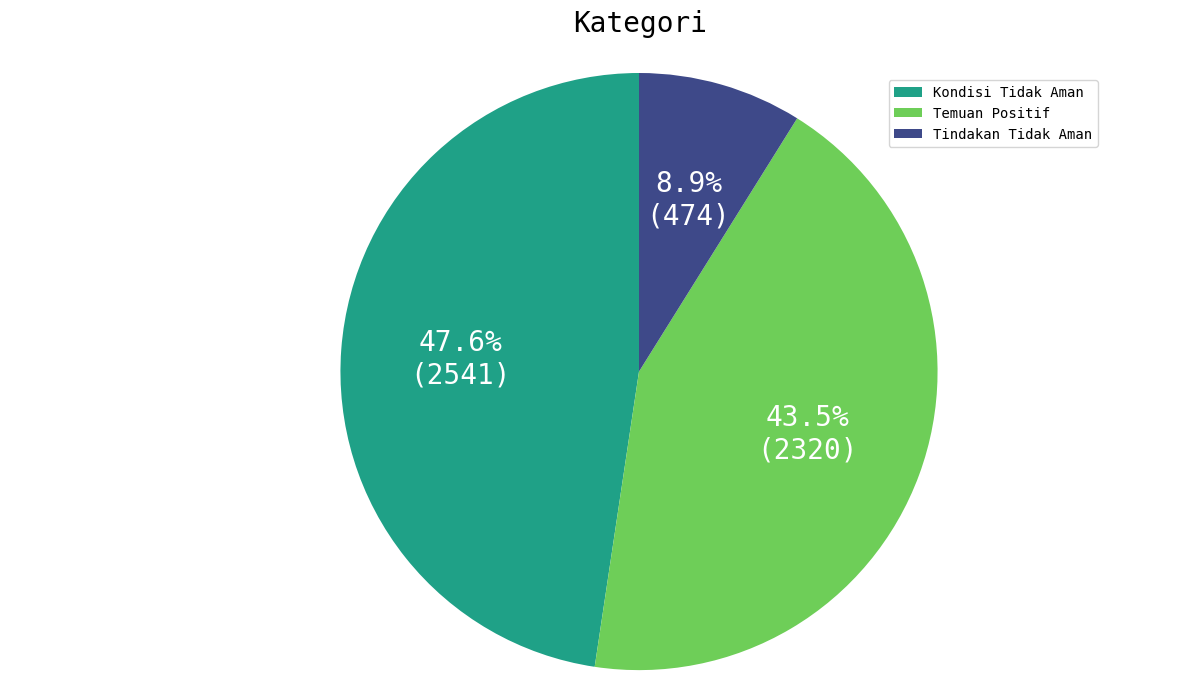

In [ ]:
# Apa saja kategori  report yang dilakukan?
plt.figure(figsize=(12,8))
value_counts =df['Kategori'].value_counts()
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()
my_colors = ['#1fa187','#6ece58', '#3e4989']
my_explode = (0, 0, 0)
plt.pie(value_counts, labels=my_labels, autopct=autopct_format(value_counts), startangle=90, shadow = False, colors=my_colors, explode=my_explode, textprops={'fontsize': 20, 'color' : 'white'})
plt.title('Kategori', fontsize=20)
plt.axis('equal')
plt.legend()
plt.show()

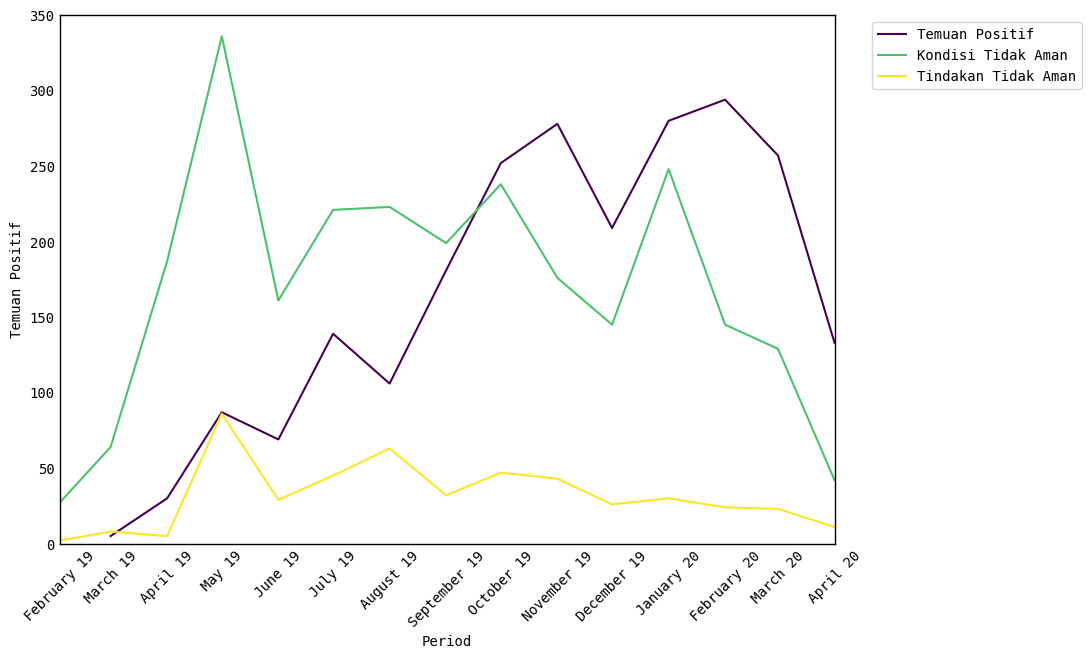

In [ ]:
# berapa jumlah aduan per bulan per kategori 
from matplotlib.dates import DateFormatter

grp = df.groupby(['Tahun', 'Bulan', 'Kategori'])["Tanggal Pembuatan"].count().unstack()
grp = grp.reset_index()
grp['Period'] = grp['Tahun'].map(str) +' '+ grp['Bulan'].map(str)
grp['Period']= pd.to_datetime(grp['Period'])
grp = grp.drop(columns=['Tahun', 'Bulan'])
fig, ax = plt.subplots(figsize=(10, 7))

sns.lineplot(data=grp, x='Period', y='Temuan Positif', color = '#440154')
sns.lineplot(data=grp, x='Period', y='Kondisi Tidak Aman', color ='#4ac16d')
sns.lineplot(data=grp, x='Period', y='Tindakan Tidak Aman', color ='#fde725')

plt.legend(['Temuan Positif', 'Kondisi Tidak Aman', 'Tindakan Tidak Aman'],  bbox_to_anchor=(1.04, 1), loc="upper left") 
ax.set(xticks=grp['Period'].values)
ax.xaxis.set_major_formatter(DateFormatter("%B %y"))
plt.ylim(0, 350)
plt.xticks(rotation=45)
plt.show()

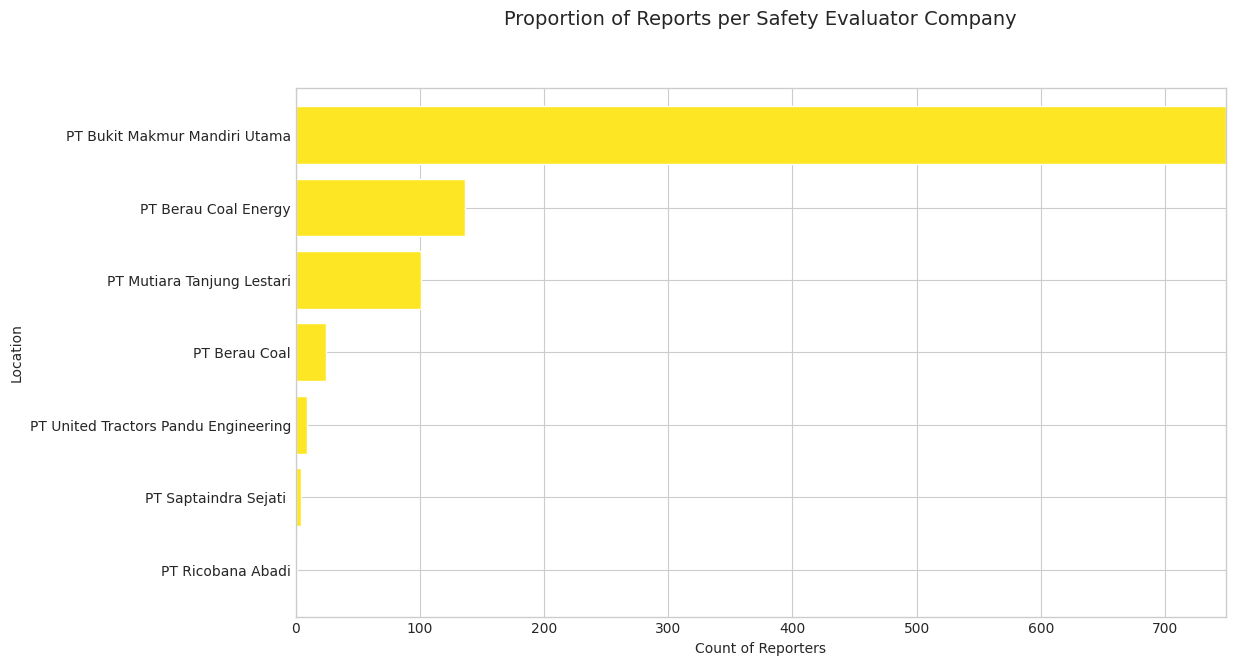

In [ ]:
# Perusahaan mana saja  yang dilaporkan?
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Perusahaan Safety Evaluator'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#fde725', width = 0.8)
plt.title('Proportion of Reports per Safety Evaluator Company\n', fontsize = 14)
plt.ylabel('Location')
plt.xlabel('Count of Reporters')
plt.show()

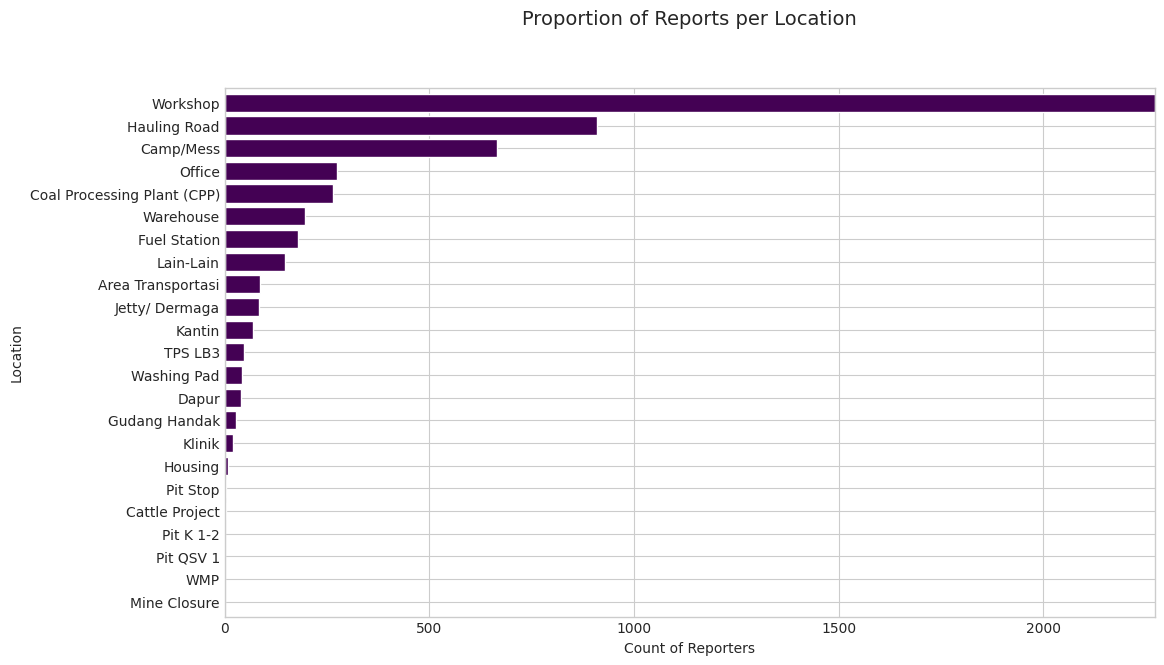

In [ ]:
# Lokasi mana saja yang dilaporkan
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Lokasi'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#440154', width = 0.8)
plt.title('Proportion of Reports per Location\n', fontsize = 14)
plt.ylabel('Location')
plt.xlabel('Count of Reporters')
plt.show()

In [ ]:
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.lower() if isinstance(x.iloc[0], str) else x)

df.head()

,Tanggal Pembuatan,Hari,Tanggal,Bulan,Tahun,Sumber Data,Pelapor,Jabatan Fungsional Pelapor,Departemen Pelapor,PIC,...,Tindakan,Due Date Penyelesaian,Tanggal Aktual Penyelesaian,Perusahaan Safety Evaluator,Nama Evaluator Car,Departemen Safety Evaluator,Kekerapan,Konsekuensi,Nilai Resiko,Status
0,2019-02-14,kamis,14,2,2019,inspeksi,agus hasyim,superintendent,operation,suyatna,...,perbaikan : berikan pendandaan,2019-02-18,2019-05-10,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,lainnya,NaN,closed
1,2019-02-18,senin,18,2,2019,inspeksi,agus hasyim,superintendent,operation,ramli azis,...,segera di lakukan pemotongan,2019-02-22,2019-02-19,NaN,NaN,NaN,kemungkinan kecil,tidak signifikan,Low,closed
2,2019-02-18,senin,18,2,2019,inspeksi,eka masril zubir,superintendent,"safety, health , & environment",nopriyan,...,NaN,NaT,NaT,pt mutiara tanjung lestari,nopriyan,safety health and environmental,langka,lainnya,NaN,bukan temuan
3,2019-02-18,senin,18,2,2019,hazard,eka masril zubir,superintendent,"safety, health , & environment",dedi purba,...,perbaikan : melapor ke tim sipil untuk perbaikan,2019-03-05,2019-03-13,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,sedang,Medium,closed
4,2019-02-18,senin,18,2,2019,hazard,eka masril zubir,superintendent,"safety, health , & environment",dedi purba,...,NaN,NaT,NaT,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,sedang,Medium,bukan temuan


In [ ]:
unique_sumber_data= df['Sumber Data'].nunique()
unique_jabatan_pelapor = df['Jabatan Fungsional Pelapor'].nunique()
unique_dept_pelapor = df['Departemen Pelapor'].nunique()
unique_jab_pic = df['Jabatan Fungsional PIC'].nunique()
unique_dept_pic = df['Departemen PIC'].nunique()
unique_lokasi = df['Lokasi'].nunique()
unique_kategori = df['Kategori'].nunique()
unique_ketidaksesuaian = df['Ketidaksesuaian'].nunique()
unique_tipe_tindakan = df['Tipe Tindakan'].nunique()
unique_akar_permasalahan = df['Akar Permasalahan'].nunique()
unique_tindakan = df['Tindakan'].nunique()
unique_perusahaan = df['Perusahaan Safety Evaluator'].nunique()
unique_evaluator= df['Nama Evaluator Car'].nunique()
unique_dept_evaluator = df['Departemen Safety Evaluator'].nunique()
unique_kekerapan = df['Kekerapan'].nunique()
unique_resiko= df['Nilai Resiko'].nunique()
unique_status = df['Status'].nunique()

print('Count the unique each features')
print('-------------------------------')
print('Sumber Data : ', unique_sumber_data)
print('Jabatan Fungsional Pelapor: ', unique_jabatan_pelapor)
print('Departemen Pelapor: ', unique_dept_pelapor)
print('Jabatan Fungsional PIC: ', unique_jab_pic )
print('Departemen PIC: ', unique_dept_pic )
print('Lokasi: ', unique_lokasi )
print('Kategori: ', unique_kategori )
print('Ketidaksesuaian: ', unique_ketidaksesuaian )
print('Tipe Tindakan: ', unique_tipe_tindakan )
print('Akar Permasalahan: ', unique_akar_permasalahan )
print('Tindakan: ', unique_tindakan )
print('Perusahaan Safety Evaluator: ', unique_perusahaan )
print('Nama Evaluator Car:', unique_evaluator)
print('Departemen Safety Evaluator: ',unique_dept_evaluator )
print('Kekerapan: ', unique_kekerapan )
print('Nilai Resiko: ', unique_resiko)
print('Status: ', unique_status)

Count the unique each features
-------------------------------
Sumber Data :  2
Jabatan Fungsional Pelapor:  9
Departemen Pelapor:  12
Jabatan Fungsional PIC:  10
Departemen PIC:  56
Lokasi:  23
Kategori:  3
Ketidaksesuaian:  58
Tipe Tindakan:  2
Akar Permasalahan:  2119
Tindakan:  2137
Perusahaan Safety Evaluator:  7
Nama Evaluator Car: 12
Departemen Safety Evaluator:  9
Kekerapan:  2
Nilai Resiko:  3
Status:  12


feature `Departemen PIC` memiliki 56 unik value namun banyak terdapat redudansi data. 
More than one name for one department 

1. `safety, health, & environment` , `safety health and environmental` , `safety, health , & environment` , `safety health and environmental`, `she`,`she departement`, `safety, health & environment`, `environment department	`
2. `operation` , `operation department`, `bc it operation department`, `port & barging operation department	`, `safety operation department`
3. `service`,`service departmen`, `emergency responses & safety services department` , `service departement`, `general services department`, `general service departemen`, `gs`,`general service` , `service`
4. `plant` , `plant departement`, 
5. `maintenace` , `asset & facility infrastructure maintenance department`, `maintenance departement`, `plant & maintenance` , `road maintenance`, `maintenace`
6. `logistic`,`logistic department` , `logistic departement`

In [ ]:
# Cleaning departmen
# define the list of values to replace
safety_replace = ['safety health and environmental', 'safety, health , & environment', 'safety health and environmental', 'she', 'she departement', 'safety, health & environment','environment department']
operation_replace =['operation department', 'bc it operation department', 'port & barging operation department', 'safety operation department']
service_replace =['service departmen', 'emergency responses & safety services department' , 'service departement', 'general services department', 'general service departemen', 'gs','general service',
                  'general service departement', 'general services departement', ' gs', ' gs ']
plant_replace = ['plant departement']
maintenace_replace =['asset & facility infrastructure maintenance department', 'maintenance departement', 'plant & maintenance' , 'road maintenance','maintenance']
logistic_replace = ['logistic department' , 'logistic departement']

# replace the values in the "Departemen PIC" 
df["Departemen PIC"] = df["Departemen PIC"].replace(safety_replace, 'safety, health, & environment')
df["Departemen PIC"] = df["Departemen PIC"].replace(operation_replace, 'operation')
df["Departemen PIC"] = df["Departemen PIC"].replace(service_replace, 'service')
df["Departemen PIC"] = df["Departemen PIC"].replace(plant_replace, 'plant')
df["Departemen PIC"] = df["Departemen PIC"].replace(maintenace_replace, 'maintenace')
df["Departemen PIC"] = df["Departemen PIC"].replace(logistic_replace, 'logistic')

In [ ]:
# table 
dept_grp = df.groupby('Departemen PIC').size().reset_index()
dept_grp.columns = ['target', 'total']
dept_grp['%'] = round(dept_grp['total']*100/sum(dept_grp['total'],2))
dept_grp.sort_values(by='total', ascending = False).style.background_gradient(cmap='Greens')

,target,total,%
24,plant,1934,36.000000
20,operation,1130,21.000000
12,human resources & general affairs,995,19.000000
17,maintenace,197,4.000000
27,"safety, health, & environment",186,3.000000
26,pscm,175,3.000000
3,coal hauling & coal processing plant,145,3.000000
28,security department,132,2.000000
29,service,92,2.000000
2,catering departement,59,1.000000


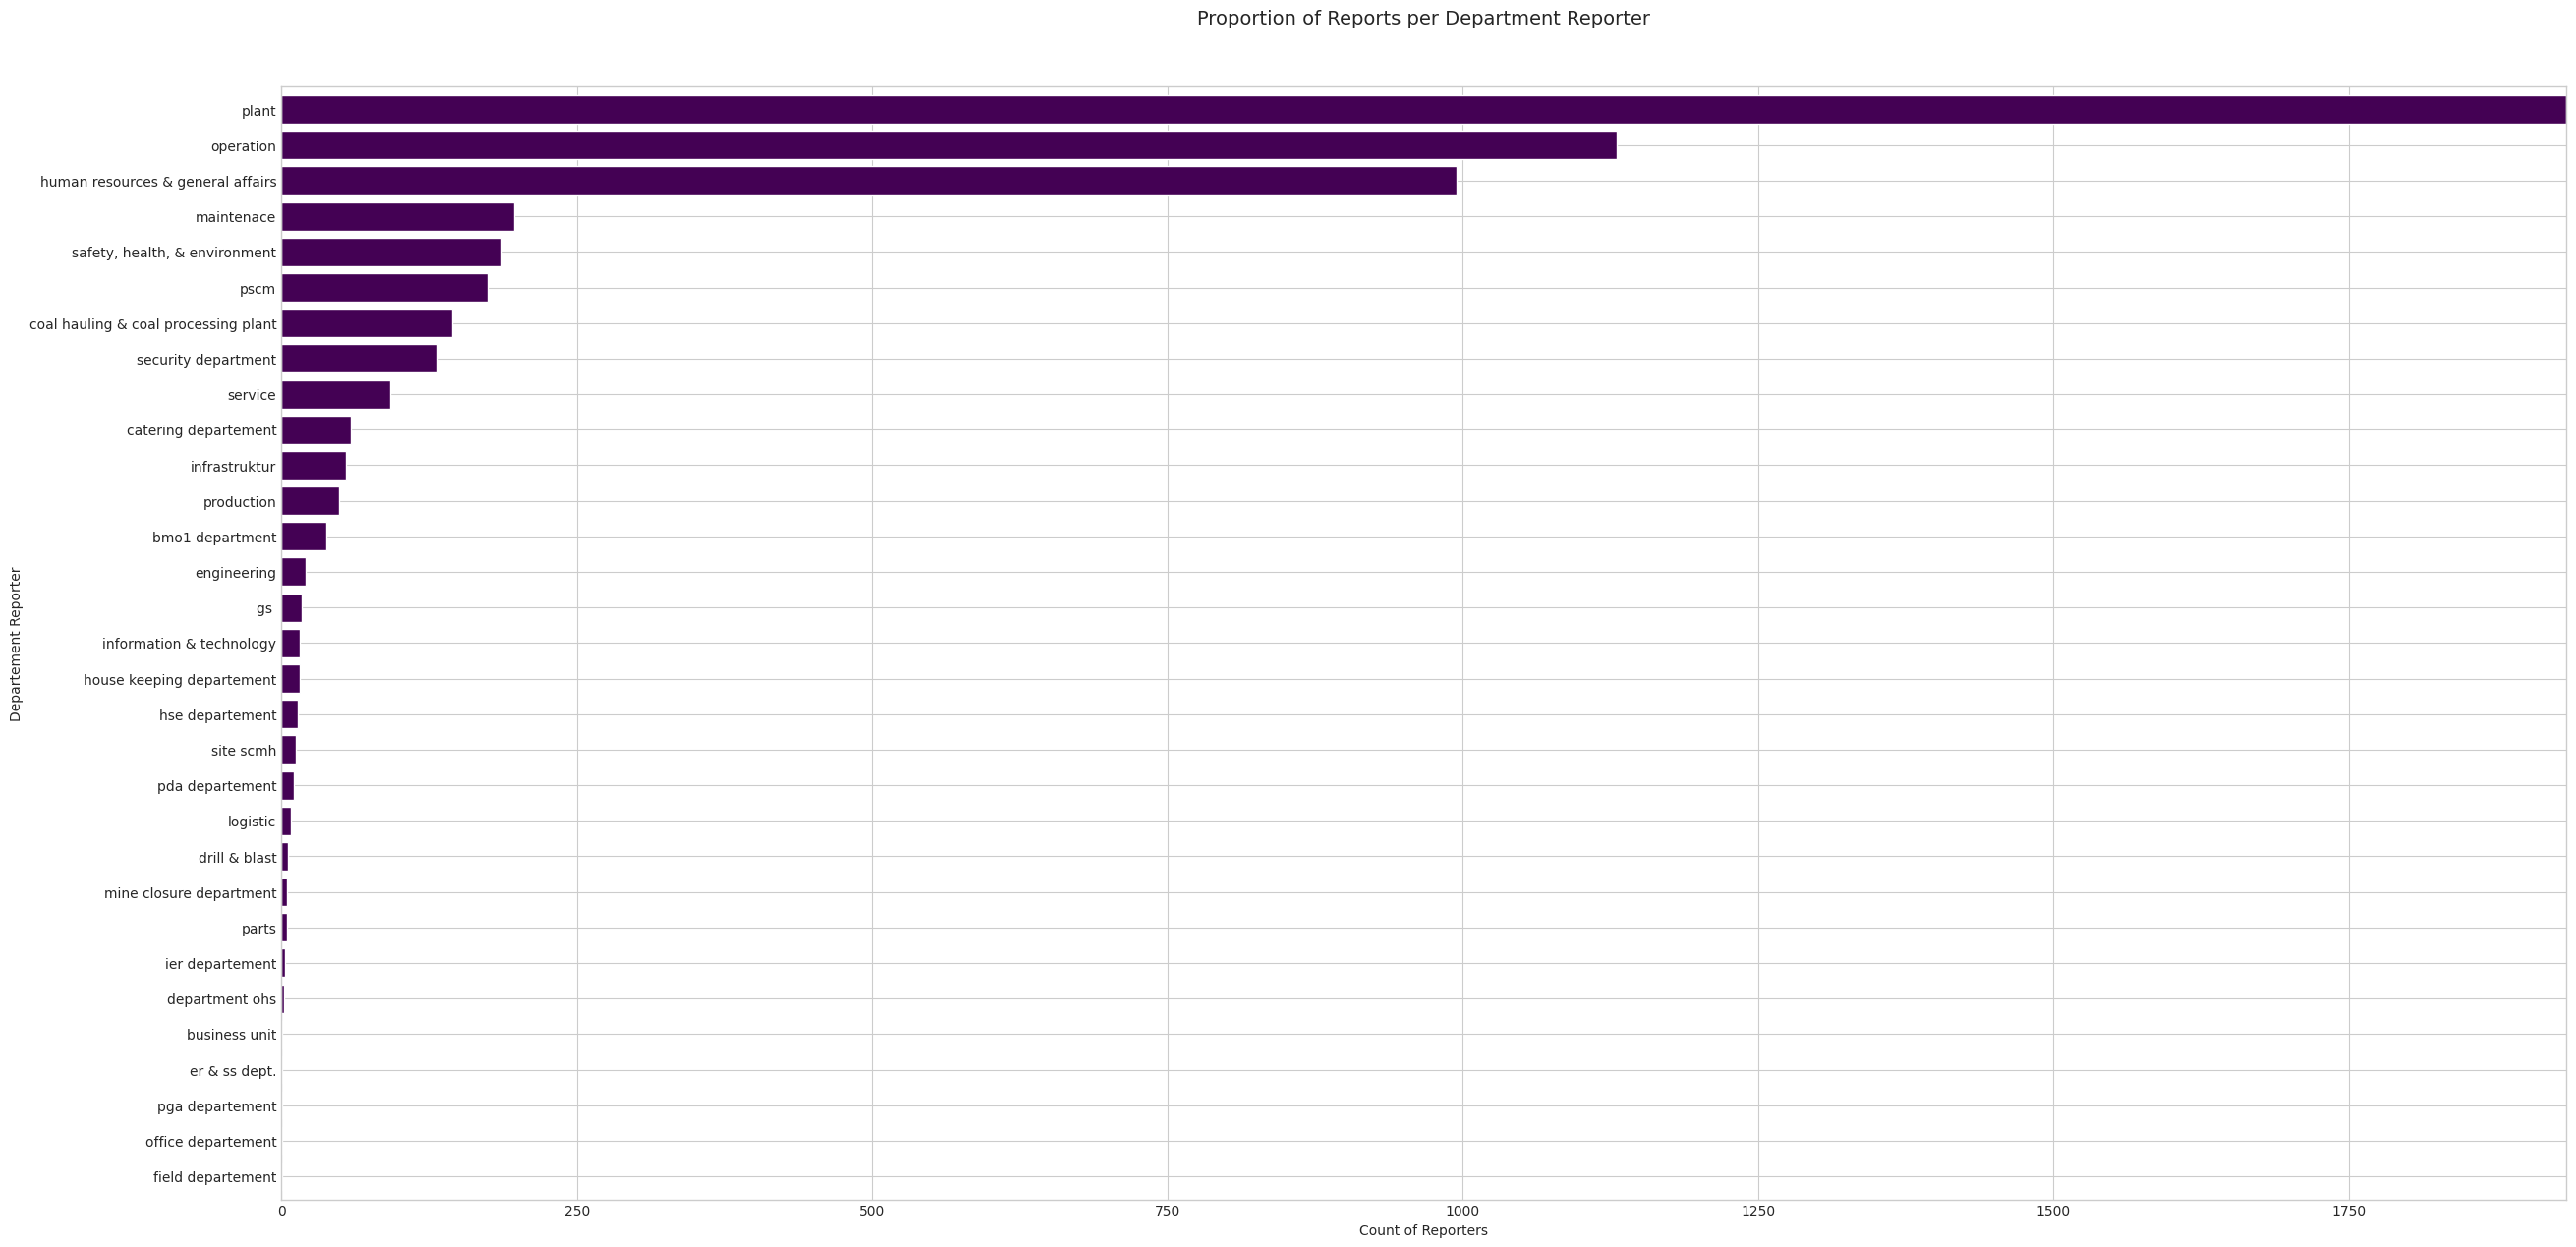

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (30,15))
grp = df['Departemen PIC'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#440154', width = 0.8)
plt.title('Proportion of Reports per Department Reporter\n', fontsize = 14)
plt.ylabel('Departement Reporter')
plt.xlabel('Count of Reporters')
plt.show()

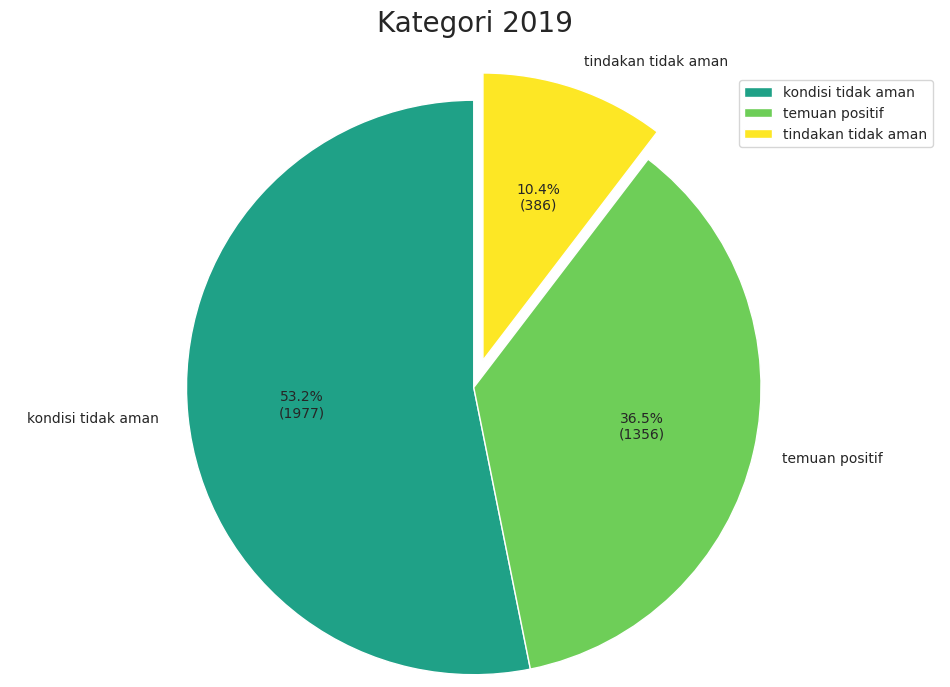

In [ ]:
# Berapa jumlah dan persentase  [Kategori] per unik value di tahun 2019
plt.figure(figsize=(12,8))

#Extract feature data
kategori = df[df["Tahun"] == 2019]['Kategori']

value_counts =kategori.value_counts()
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()
my_colors = ['#1fa187','#6ece58', '#fde725']
my_explode = (0, 0, 0.1)
plt.pie(value_counts, labels=my_labels, autopct=autopct_format(value_counts), startangle=90, shadow = False, colors=my_colors, explode=my_explode, textprops={'fontsize': 10})
plt.title('Kategori 2019', fontsize=20)
plt.axis('equal')
plt.legend()
plt.show()


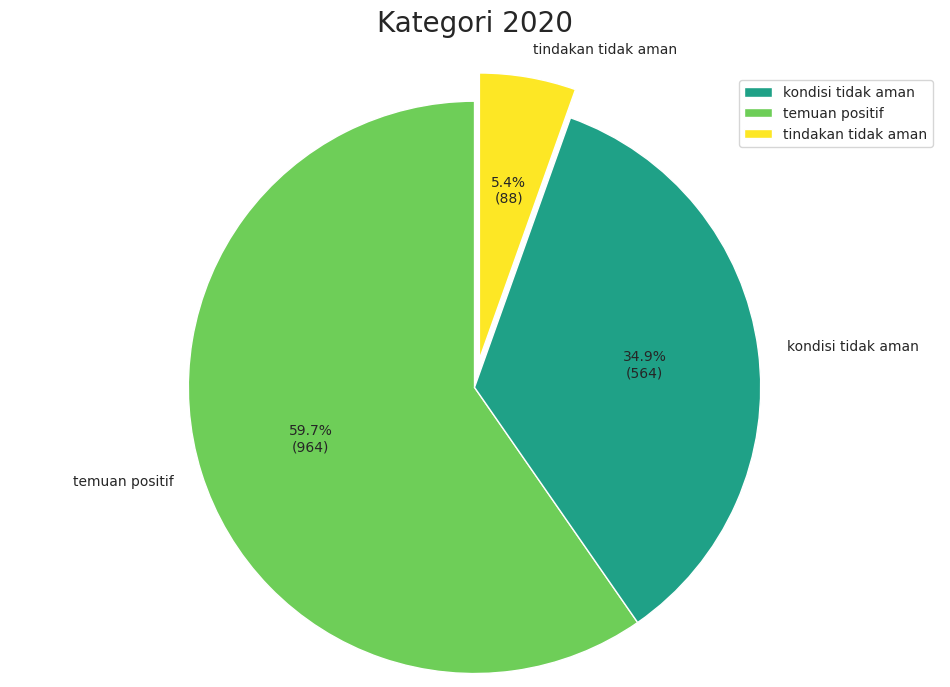

In [ ]:
#Berapa jumlah dan persentase  [Kategori] per unik value di tahun 2020
plt.figure(figsize=(12,8))

#Extract feature data
kategori = df[df["Tahun"] == 2020]['Kategori']

# Count the number of occurrences for each unique value
value_counts =kategori.value_counts()

# Get labels and size
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()

my_colors = ['#6ece58', '#1fa187', '#fde725']
my_explode = (0, 0, 0.1)
plt.pie(value_counts, labels=my_labels, autopct=autopct_format(value_counts), startangle=90, shadow = False, colors=my_colors, explode=my_explode, textprops={'fontsize': 10})
plt.title('Kategori 2020', fontsize=20)
plt.axis('equal')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2]
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()

In [ ]:
grp = df[['Departemen PIC', 'Kategori'] ]
grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')
grp = grp.groupby(['Departemen PIC',  'Kategori'])['Kategori'].count()
grp = grp.reset_index(name="Count")
grp.sort_values("Count",  ascending=False)


<ipython-input-26-7efe4aad82b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')


,Departemen PIC,Kategori,Count
36,plant,temuan negatif,1070
37,plant,temuan positif,864
18,human resources & general affairs,temuan negatif,683
31,operation,temuan positif,678
30,operation,temuan negatif,452
19,human resources & general affairs,temuan positif,312
26,maintenace,temuan negatif,177
44,security department,temuan negatif,131
43,"safety, health, & environment",temuan positif,96
6,coal hauling & coal processing plant,temuan positif,92


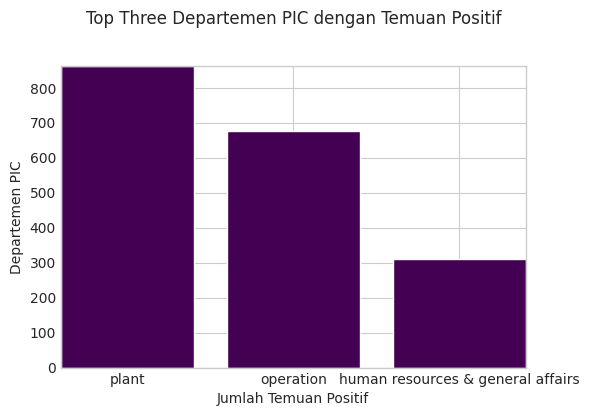

In [ ]:
grp = df[['Departemen PIC', 'Kategori']]
#grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')
grp = grp[grp["Kategori"] == 'temuan positif']
grp = grp.groupby(['Departemen PIC'])['Departemen PIC'].count()
grp = grp.reset_index(name="Count")
grp = grp.sort_values("Count", ascending=False) # mengubah sorting menjadi descending
plt.bar(grp["Departemen PIC"].head(3), grp["Count"].head(3), color ='#440154' ) # hanya menampilkan 3 data teratas
plt.title("Top Three Departemen PIC dengan Temuan Positif")
plt.xlabel("Jumlah Temuan Positif")
plt.ylabel("Departemen PIC")
plt.show()


<ipython-input-28-815362b610b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')


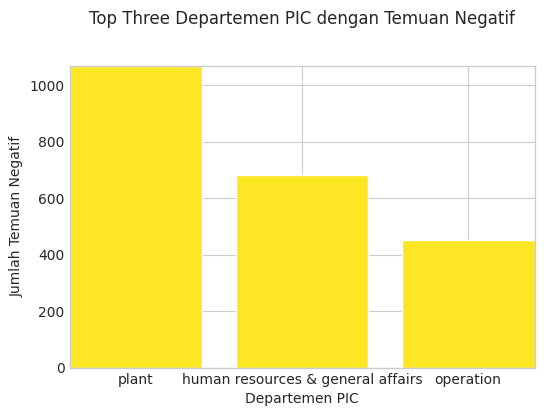

In [ ]:
grp = df[['Departemen PIC', 'Kategori']]
grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')
grp = grp[grp["Kategori"] == 'temuan negatif']
grp = grp.groupby(['Departemen PIC'])['Departemen PIC'].count()
grp = grp.reset_index(name="Count")
grp = grp.sort_values("Count", ascending=False) # mengubah sorting menjadi descending
plt.bar(grp["Departemen PIC"].head(3), grp["Count"].head(3), color ='#fde725') # hanya menampilkan 3 data teratas
plt.title("Top Three Departemen PIC dengan Temuan Negatif")
plt.xlabel("Departemen PIC")
plt.ylabel("Jumlah Temuan Negatif")
plt.show()


Temuan unik : plant , human resources & general affairs , dan operation adalah top three the best sekaligus the worst department

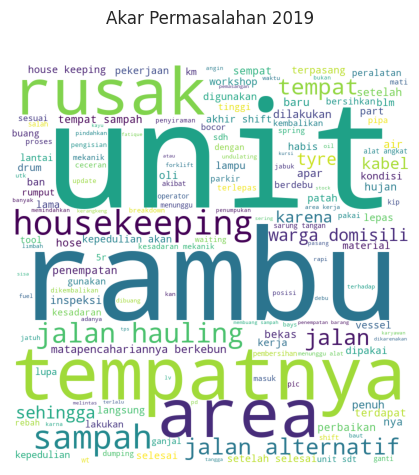

In [ ]:
#bigest causes in 2019
comment_words = ''
stopwords = set(["di", "didalam", "dan", "yg", "nan", "tidak", "ada", "yang", "belum", "tdk", "pada", "masih", "saat", "dari", "oleh", "untuk",
                 "sudah", "dalam","melakukan", "ke", "lain", "kurang", "kurangnya", "kurang nya"])
for val in df[(df["Tahun"] == 2019)]['Akar Permasalahan']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Akar Permasalahan 2019')
plt.show()

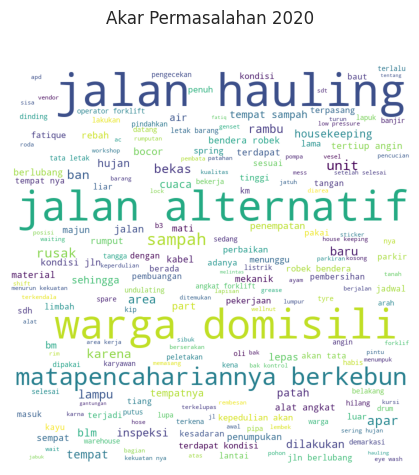

In [ ]:
#bigest causes in 2020
comment_words = ''
stopwords = set(["di", "didalam", "dan", "yg", "nan", "tidak", "ada", "yang", "belum", "tdk", "pada", "masih", "saat", "dari", "oleh", "untuk",
                 "sudah", "dalam","melakukan", "ke", "lain", "kurang", "kurangnya", "kurang nya"])
for val in df[(df["Tahun"] == 2020)]['Akar Permasalahan']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Akar Permasalahan 2020')
plt.show()

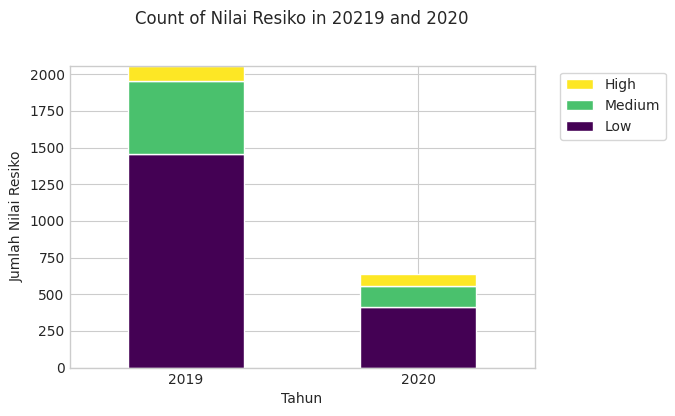

In [ ]:
# berapa  nilai resiko di tahun 2019 dan tahun 2020
grp = df.groupby(['Tahun', 'Nilai Resiko'])['Tanggal Pembuatan'].count().unstack()
categories = ['Low', 'Medium', 'High']
grp.columns = pd.CategoricalIndex(grp.columns.values, 
                                 ordered=True, 
                                 categories=categories)
grp = grp.sort_index(axis=1)
ax = grp.plot(kind='bar',stacked=True, color = ['#440154', '#4ac16d', '#fde725'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Count of Nilai Resiko in 20219 and 2020')
plt.ylabel('Jumlah Nilai Resiko')
plt.xticks(rotation=0)
plt.show()

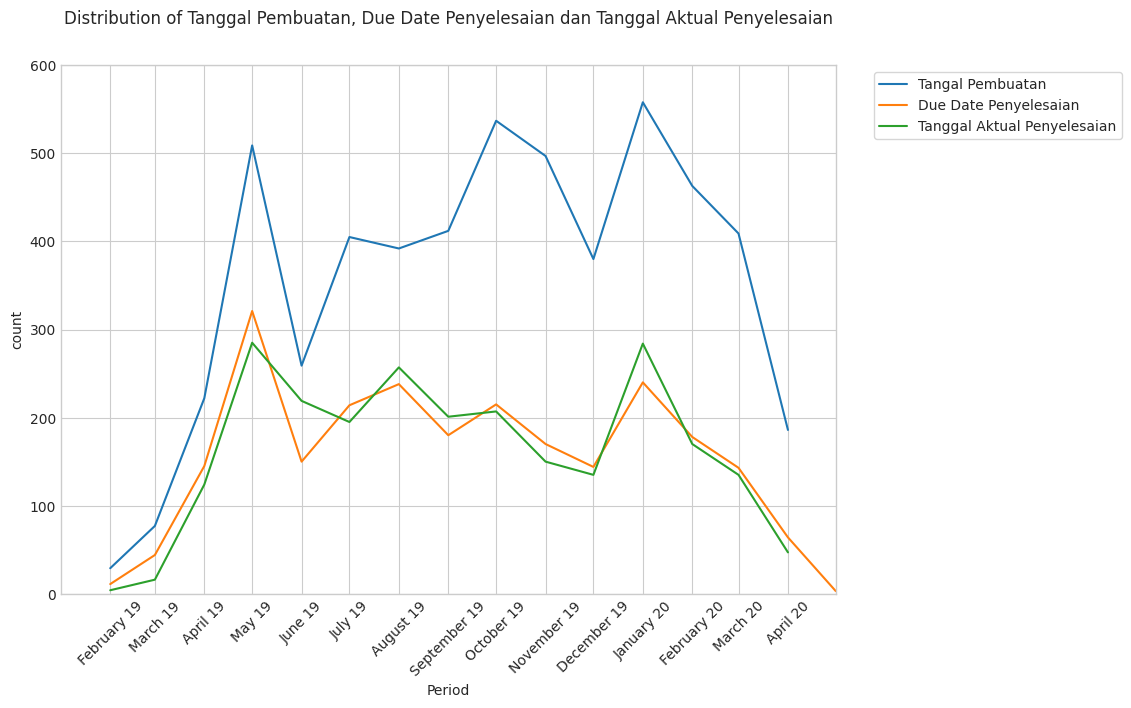

In [ ]:
# bagaimana tindakan terhadap pelaporan aktualisasi penyelesaian 
grp1 = pd.DataFrame({'count' : df.groupby([ "Tahun", "Bulan"]).size()}).reset_index()
grp1['Period'] = grp1['Tahun'].map(str) +' '+ grp1['Bulan'].map(str)
grp1['Period']= pd.to_datetime(grp1['Period'])
grp1 = grp1.drop(columns=['Tahun', 'Bulan'])

df_due = pd.DataFrame()
df_due['Due Date Penyelesaian'] = df['Due Date Penyelesaian']
df_due = df_due.dropna()
df_due['Bulan'] = df_due['Due Date Penyelesaian'].dt.month
df_due['Tahun'] = df_due['Due Date Penyelesaian'].dt.year
grp2 = pd.DataFrame({'count' : df_due.groupby( [ "Tahun", "Bulan"] ).size()}).reset_index()
grp2 = grp2.reset_index()
grp2['Period'] = grp2['Tahun'].map(str) +' '+ grp2['Bulan'].map(str)
grp2['Period']= pd.to_datetime(grp2['Period'])
grp2 = grp2.drop(columns=['Tahun', 'Bulan', "index"])

df_act = pd.DataFrame()
df_act['Tanggal Aktual Penyelesaian'] = df['Tanggal Aktual Penyelesaian']
df_act = df_act.dropna()
df_act['Bulan'] = df_act['Tanggal Aktual Penyelesaian'].dt.month
df_act['Tahun'] = df_act['Tanggal Aktual Penyelesaian'].dt.year
grp3 = pd.DataFrame({'count' : df_act.groupby( [ "Tahun", "Bulan"] ).size()}).reset_index()
grp3 = grp3.reset_index()
grp3['Period'] = grp3['Tahun'].map(str) +' '+ grp3['Bulan'].map(str)
grp3['Period']= pd.to_datetime(grp3['Period'])
grp3 = grp3.drop(columns=['Tahun', 'Bulan', "index"])

fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=grp1, x='Period', y='count')
sns.lineplot(data=grp2, x='Period', y='count')
sns.lineplot(data=grp3, x='Period', y='count')
ax.set(xticks=grp1['Period'].values)
ax.xaxis.set_major_formatter(DateFormatter("%B %y"))
plt.xlim([datetime.date(2019, 1, 1), datetime.date(2020, 5, 1)])
plt.ylim(0, 600)
plt.xticks(rotation=45)
plt.title('Distribution of Tanggal Pembuatan, Due Date Penyelesaian dan Tanggal Aktual Penyelesaian')
plt.legend(['Tangal Pembuatan', 'Due Date Penyelesaian', 'Tanggal Aktual Penyelesaian'],  bbox_to_anchor=(1.04, 1), loc="upper left") 
plt.show()

In [ ]:
grp = df[['Tanggal Pembuatan', 'Due Date Penyelesaian', 'Tanggal Aktual Penyelesaian']]
grp = grp.dropna()
grp['durasi penyelesaian-pembuatan'] = (grp['Due Date Penyelesaian'] - grp['Tanggal Pembuatan']).dt.days
grp['durasi aktual-penyelesaian'] = (grp['Tanggal Aktual Penyelesaian'] - grp['Due Date Penyelesaian']).dt.days
grp = grp.drop(columns=['Tanggal Pembuatan', 'Due Date Penyelesaian', 'Tanggal Aktual Penyelesaian'])
grp.describe()

,durasi penyelesaian-pembuatan,durasi aktual-penyelesaian
count,2429.000000,2429.000000
mean,-11.523672,1.141622
std,83.698574,26.593416
min,-315.000000,-535.000000
25%,0.000000,-2.000000
50%,1.000000,0.000000
75%,7.000000,1.000000
max,536.000000,122.000000


In [ ]:
import scipy.stats as st
print("95% Confidence Interval durasi penyelesaian-pembuatan")
print(st.norm.interval(alpha=0.99, loc=np.mean(grp['durasi penyelesaian-pembuatan'] ), scale=st.sem(grp['durasi penyelesaian-pembuatan'])))
print("95% Confidence Interval durasi aktual-penyelesaian")
print(st.norm.interval(alpha=0.99, loc=np.mean(grp['durasi aktual-penyelesaian'] ), scale=st.sem(grp['durasi aktual-penyelesaian'])))

95% Confidence Interval durasi penyelesaian-pembuatan
(-15.898101403952971, -7.149243182296516)
95% Confidence Interval durasi aktual-penyelesaian
(-0.24825837325084876, 2.5315025066390744)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


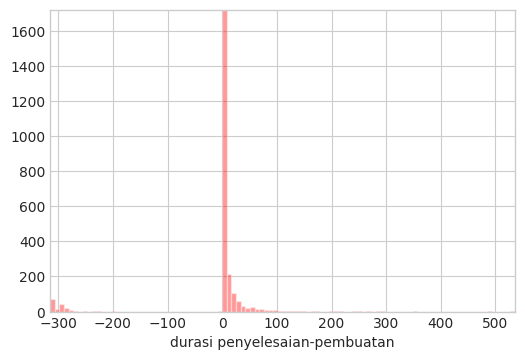

In [ ]:
sns.distplot(grp['durasi penyelesaian-pembuatan'], kde = False, color ='red', bins = 100)

mostly `Tanggal Pembuatan` dan `Due Date Penyelesaian` tidak memiliki silisih, ini adalah hal baik sebab ketika permasalah dilaporkan hari itu juga ditentukan kapan akan diselesaikan masalah tersebut.

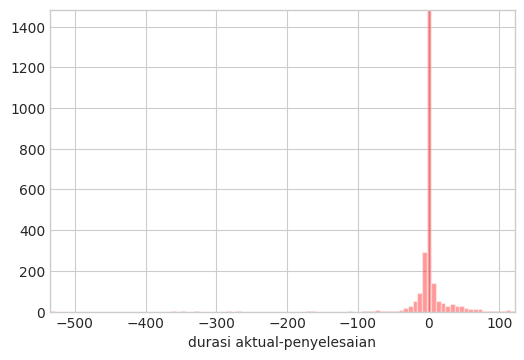

In [ ]:
sns.distplot(grp['durasi aktual-penyelesaian'], kde = False, color ='red', bins = 100)

Begitu juga dengan `Due Date Penyelesaian` dan `Tanggal Aktual Penyelesaian` memiliki selisih yang sedikit. terlihat bahwa hampir semua rencana penyelesaian diselesaikan tepat pada waktunya. 

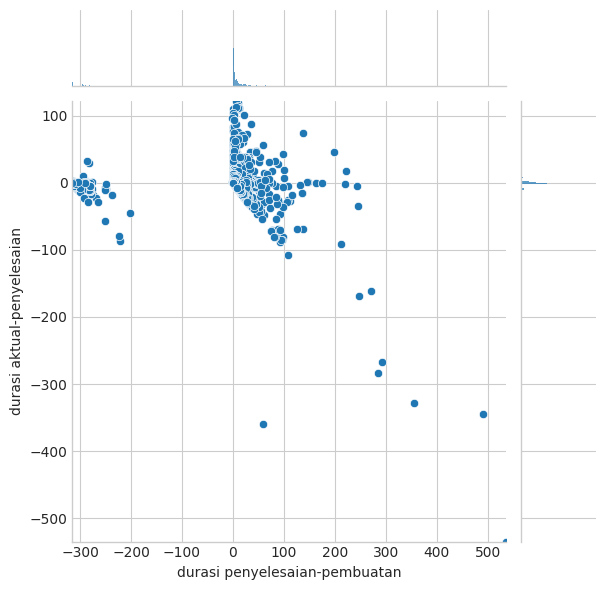

In [ ]:
sns.jointplot(x ='durasi penyelesaian-pembuatan', y ='durasi aktual-penyelesaian', data = grp)

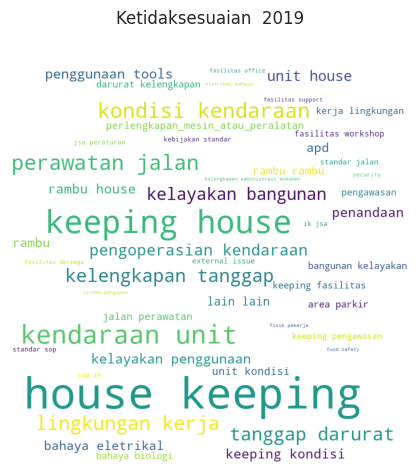

In [ ]:
# wordcloud ketidaksesuaian 2019
from wordcloud import WordCloud
comment_words = ''
stopwords = set(["di", "didalam", "dan", "yg", "nan", "tidak", "ada", "yang", "belum", "tdk", "pada", "masih", "saat"])
for val in df[(df["Tahun"] == 2019)]['Ketidaksesuaian']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian  2019')
plt.show()

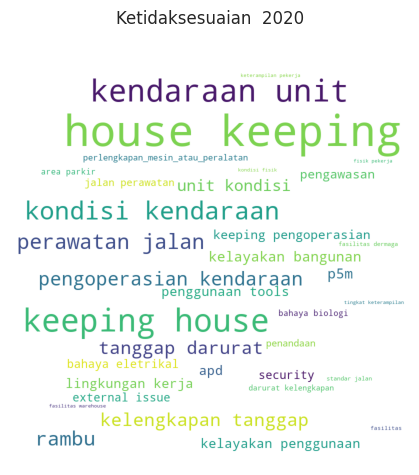

In [ ]:
# wordcloud ketidaksesuaian 2020
from wordcloud import WordCloud
comment_words = ''
stopwords = set(["di", "didalam", "dan", "yg", "nan", "tidak", "ada", "yang", "belum", "tdk", "pada", "masih", "saat"])
for val in df[(df["Tahun"] == 2020)]['Ketidaksesuaian']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian  2020')
plt.show()

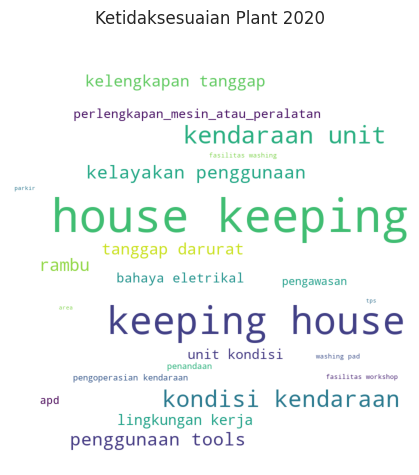

In [ ]:
comment_words = ''
for val in df[(df["Departemen PIC"] == 'plant') & (df["Tahun"] == 2020)]['Ketidaksesuaian']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian Plant 2020')
plt.show()

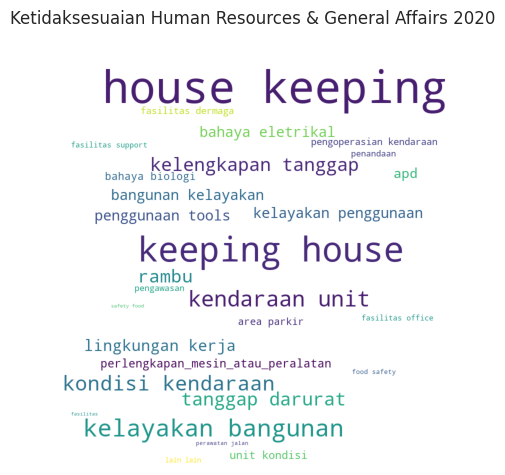

In [ ]:
for val in df[(df["Departemen PIC"] == 'human resources & general affairs') & (df["Tahun"] == 2019)]['Ketidaksesuaian']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian Human Resources & General Affairs 2020')
plt.show()

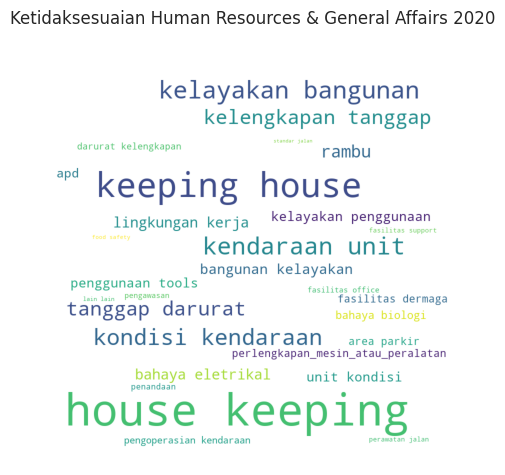

In [ ]:
for val in df[(df["Departemen PIC"] == 'human resources & general affairs') & (df["Tahun"] == 2020)]['Ketidaksesuaian']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian Human Resources & General Affairs 2020')
plt.show()

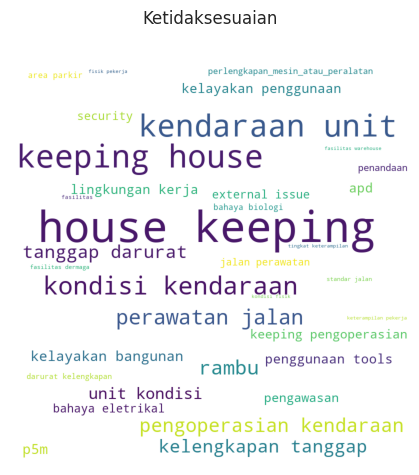

In [ ]:
# wordcloud ketidaksesuaian 
comment_words = ''
stopwords = set(["di", "didalam", "dan", "yg", "nan", "tidak", "ada", "yang", "belum", "tdk", "pada", "masih", "saat"])
#for val in df[(df["Departemen PIC"] == 'human resources & general affairs') & (df["Tahun"] == 2020)]['Ketidaksesuaian']:
for val in df[df["Tahun"] == 2020]['Ketidaksesuaian'] :
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Ketidaksesuaian')
plt.show()

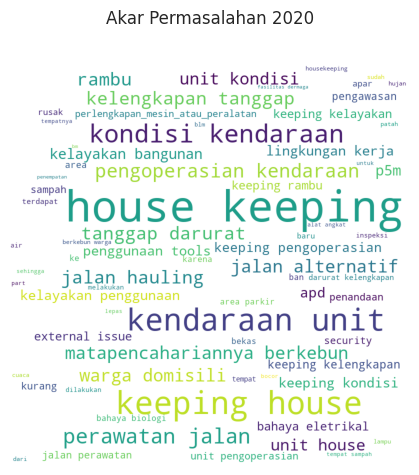

In [ ]:
for val in df[(df["Tahun"] == 2020)]['Akar Permasalahan']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                prefer_horizontal=1).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Akar Permasalahan 2020')
plt.show()

<ipython-input-46-480ee0dd0ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')


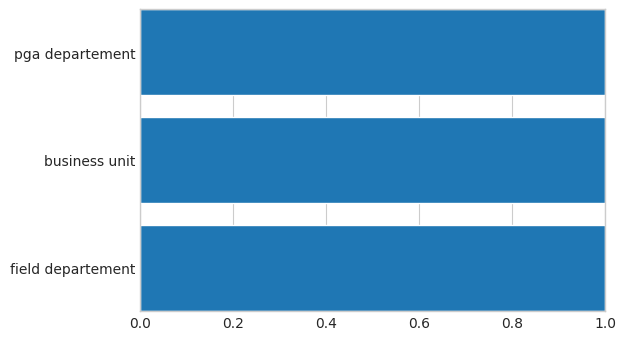

In [ ]:
grp = df[['Departemen PIC', 'Kategori']]
grp['Kategori'] = grp['Kategori'].replace(['kondisi tidak aman','tindakan tidak aman'], 'temuan negatif')
#grp = grp[grp["Kategori"] == 'temuan positif']
grp = grp.groupby(['Departemen PIC'])['Departemen PIC'].count()
grp = grp.reset_index(name="Count")
grp = grp.sort_values("Count")
grp = grp[:3]
plt.barh(grp["Departemen PIC"], grp["Count"])
plt.show()